In [91]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [92]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [93]:
df = pd.read_csv("../Python/Output/AdjMatrix.txt", sep='\t')
df.head()

,NoiseType,Noise,Size,Repeat,Loss Uncertainty,Error Deviation,Error Mean,Error Minimum,Error Maximum,Forward Deviation,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,Gaussian,0.000000e+00,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.081646,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
1,Gaussian,0.000000e+00,6,4,0.000000,0.323480,-0.003928,-0.912026,0.692048,0.411902,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
2,Gaussian,0.000000e+00,7,3,0.000000,2.054362,0.209896,-3.988472,5.533592,1.363401,...,0.119048,0.047619,0.047619,0.047619,0.0,0.023810,0.02381,0.0,0.0,0.0
3,Gaussian,1.000000e-17,4,7,0.000000,0.077245,0.003859,-0.629626,0.501010,0.065890,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
4,Gaussian,1.000000e-16,4,7,0.011719,0.743182,-0.037312,-1.700284,2.179343,0.235273,...,0.037594,0.000000,0.015038,0.007519,0.0,0.007519,0.00000,0.0,0.0,0.0


In [94]:
df.columns

Index(['NoiseType', 'Noise', 'Size', 'Repeat', 'Loss Uncertainty',
       'Error Deviation', 'Error Mean', 'Error Minimum', 'Error Maximum',
       'Forward Deviation', 'Forward Mean', 'Forward Minimum',
       'Forward Maximum', 'Roundtrip Deviation', 'Roundtrip Mean',
       'Roundtrip Minimum', 'Roundtrip Maximum', 'Uncertainty Deviation',
       'Uncertainty Mean', 'Uncertainty Minimum', 'Uncertainty Maximum',
       '-3.0', '-2.8', '-2.6', '-2.4', '-2.2', '-2.0', '-1.8', '-1.6', '-1.4',
       '-1.2', '-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0', '0.2', '0.4',
       '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0', '2.2', '2.4',
       '2.6', '2.8', '3.0'],
      dtype='object')

# Overall

In [95]:
def PlotSurface(value, title='', logz=False, zlim=[]):
    dfOrderVsNoise = df[(df['Noise']>0)]\
                .pivot(index='Noise', columns='Size', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'{value}')
    
    ax.set_xlabel('Size')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 1)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])
    elif zlim:
        ax.set_zlim(zlim)

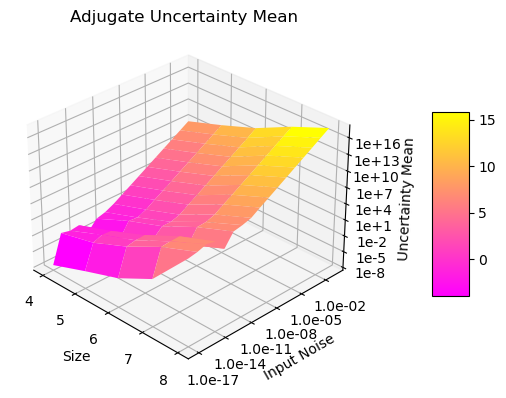

In [96]:
PlotSurface('Uncertainty Mean', title='Adjugate Uncertainty Mean', logz=True)

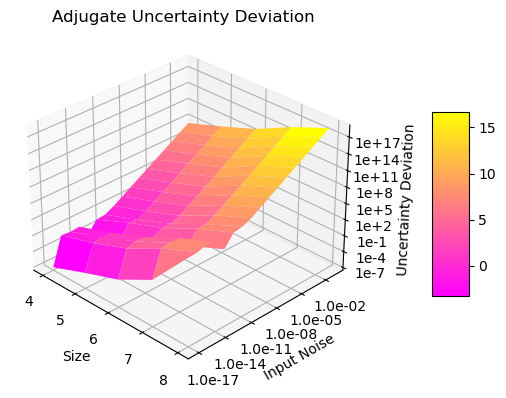

In [97]:
PlotSurface('Uncertainty Deviation', title='Adjugate Uncertainty Deviation', logz=True)

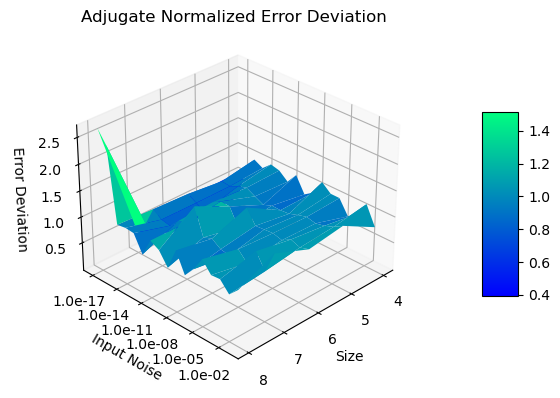

In [98]:
PlotSurface('Error Deviation', title='Adjugate Normalized Error Deviation')

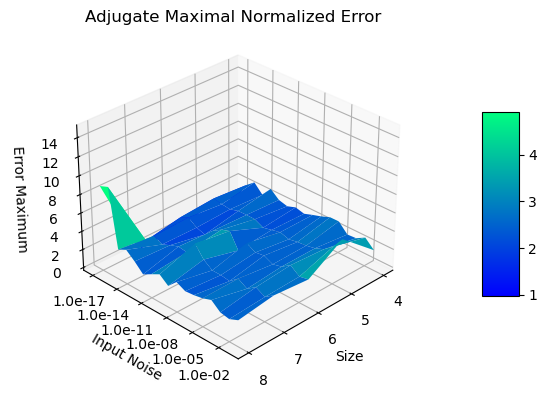

In [99]:
PlotSurface('Error Maximum', title='Adjugate Maximal Normalized Error', zlim=(0,15))

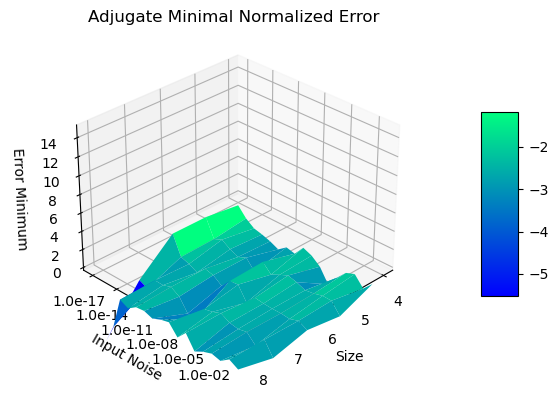

In [100]:
PlotSurface('Error Minimum', title='Adjugate Minimal Normalized Error', zlim=(0,15))

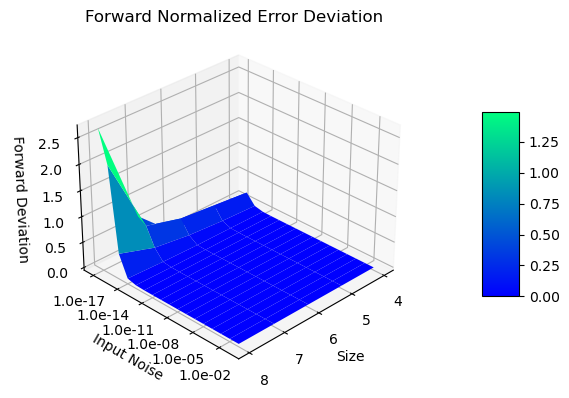

In [101]:
PlotSurface('Forward Deviation', title='Forward Normalized Error Deviation')

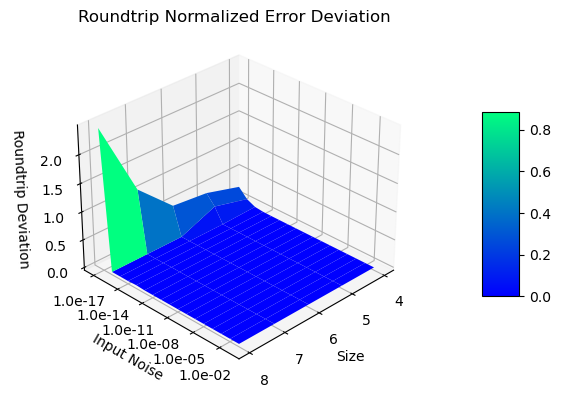

In [110]:
PlotSurface('Roundtrip Deviation', title='Roundtrip Normalized Error Deviation')

# Normalized Error Histogram

In [103]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0,0.00000,0.00000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
1,0.0,0.00000,0.00000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
2,0.0,0.02381,0.02381,0.02381,0.0,0.047619,0.023810,0.071429,0.000000,0.047619,...,0.119048,0.047619,0.047619,0.047619,0.0,0.023810,0.02381,0.0,0.0,0.0
3,0.0,0.00000,0.00000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
4,0.0,0.00000,0.00000,0.00000,0.0,0.000000,0.007519,0.015038,0.022556,0.037594,...,0.037594,0.000000,0.015038,0.007519,0.0,0.007519,0.00000,0.0,0.0,0.0


In [104]:
df['Label'] = df['Size'].astype(str) + ' ' + df['Noise'].astype(str)
df.columns

Index(['NoiseType', 'Noise', 'Size', 'Repeat', 'Loss Uncertainty',
       'Error Deviation', 'Error Mean', 'Error Minimum', 'Error Maximum',
       'Forward Deviation', 'Forward Mean', 'Forward Minimum',
       'Forward Maximum', 'Roundtrip Deviation', 'Roundtrip Mean',
       'Roundtrip Minimum', 'Roundtrip Maximum', 'Uncertainty Deviation',
       'Uncertainty Mean', 'Uncertainty Minimum', 'Uncertainty Maximum',
       '-3.0', '-2.8', '-2.6', '-2.4', '-2.2', '-2.0', '-1.8', '-1.6', '-1.4',
       '-1.2', '-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0', '0.2', '0.4',
       '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0', '2.2', '2.4',
       '2.6', '2.8', '3.0', 'Label'],
      dtype='object')

<AxesSubplot:title={'center':'Adjugate Normalized Error Histogram'}>

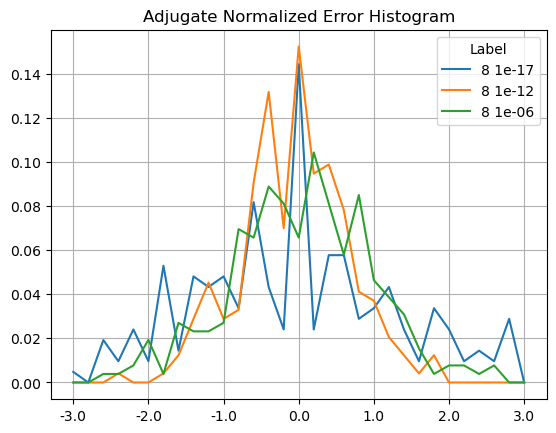

In [105]:
dfHisto = df[(df['Noise'].isin([1e-17, 1e-12, 1e-6])) & (df['Size']==8)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

<AxesSubplot:title={'center':'Adjugate Normalized Error Histogram'}>

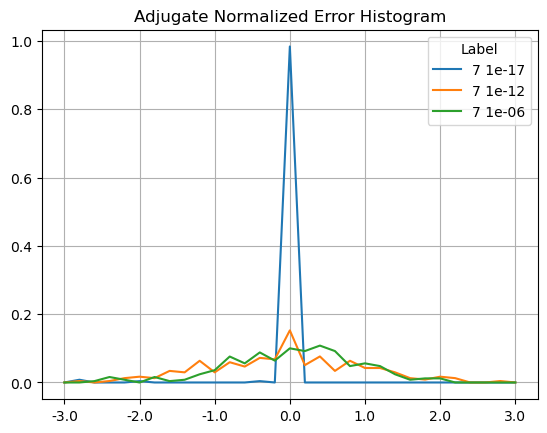

In [106]:
dfHisto = df[(df['Noise'].isin([1e-17, 1e-12, 1e-6])) & (df['Size']==7)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

<AxesSubplot:title={'center':'Adjugate Normalized Error Histogram'}>

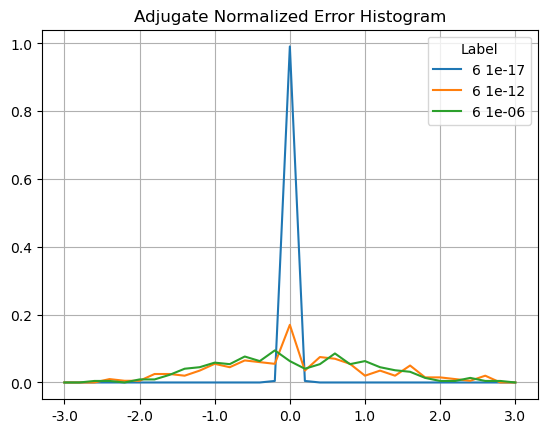

In [107]:
dfHisto = df[(df['Noise'].isin([1e-17, 1e-12, 1e-6])) & (df['Size']==6)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

<AxesSubplot:title={'center':'Adjugate Normalized Error Histogram'}>

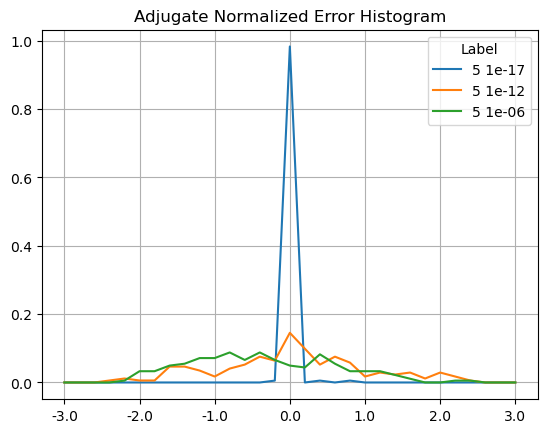

In [108]:
dfHisto = df[(df['Noise'].isin([1e-17, 1e-12, 1e-6])) & (df['Size']==5)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')

<AxesSubplot:title={'center':'Adjugate Normalized Error Histogram'}>

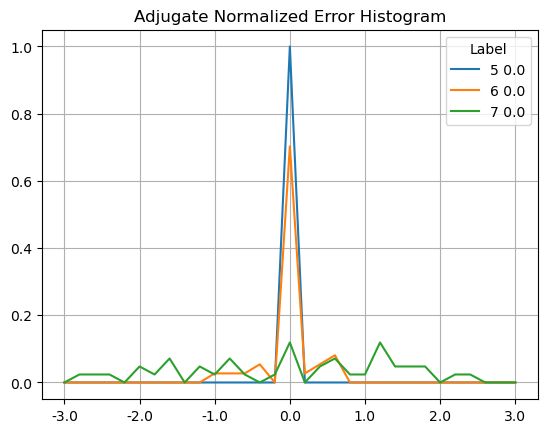

In [109]:
dfHisto = df[(df['Noise']==0)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram')